In [3]:
#encoding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# 直接在python console里面生成图像

In [5]:
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [16]:
# df1~ is DataFrame datatype
df1 = pd.read_csv('data/user_behaviour_201809_01.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df2 = pd.read_csv('data/user_behaviour_201809_02.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df3 = pd.read_csv('data/user_behaviour_201809_03.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df4 = pd.read_csv('data/user_behaviour_201809_04.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df5 = pd.read_csv('data/user_behaviour_201809_05.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df6 = pd.read_csv('data/user_behaviour_201809_06.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
df7 = pd.read_csv('data/user_behaviour_201809_07.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
# df8 = pd.read_csv('data/user_behaviour_201810_01.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
# df9 = pd.read_csv('data/user_behaviour_201810_02.csv', sep=',', header=0, parse_dates=["使用时间"], encoding='gb2312')
print(type(df1))
print(df1.head(10),'\n', 'df1 first 10 elements')
frames = [df1, df2, df3, df4, df5, df6, df7]
data = pd.concat(frames)
# concat是对几个数据集的拼接
# overall_information，count，mean，std，min，max
data.describe()
# data.shape

<class 'pandas.core.frame.DataFrame'>
           IMEI        日期           APP名称                使用时间  使用时长  \
0  8633****5756  20180901           搜狗输入法 2018-09-01 00:01:00     4   
1  8660****9090  20180901  GnssPowerSaver 2018-09-01 00:01:00     5   
2  A000****6B5D  20180901            塔读文学 2018-09-01 00:00:00     9   
3  A000****6B5D  20180901          华为应用市场 2018-09-01 00:01:00     2   
4  A000****6B5D  20180901            搜狐视频 2018-09-01 00:01:00    10   
5  A100****9464  20180901            手机管家 2018-09-01 00:03:00     2   
6  8642****0853  20180901           章鱼输入法 2018-09-01 00:03:00     4   
7  A000****B5DE  20180901           电信营业厅 2018-09-01 00:03:00     2   
8  9900****7669  20180901            系统桌面 2018-09-01 00:04:00    11   
9  A100****1FA9  20180901              任务 2018-09-01 00:00:00   148   

        使用流量  GPS经度  GPS纬度   省   市             手机型号 注册省 注册市  
0        NaN    NaN    NaN  上海  上海         OPPO R9s  上海  上海  
1        NaN    NaN    NaN  上海  上海        OPPO A37m  上海 

,日期,使用时间,使用时长,使用流量,GPS经度,GPS纬度
count,4.229315e+06,4229315,4.229315e+06,9.539850e+05,4384.000000,4384.000000
mean,2.018091e+07,2018-09-14 03:11:14.725573632,5.165055e+02,4.693946e+06,121.412267,31.214000
min,2.018090e+07,2018-09-01 00:00:00,1.000000e+00,0.000000e+00,120.429175,30.658342
25%,2.018091e+07,2018-09-06 22:24:02,3.000000e+00,2.236500e+04,121.300736,31.135859
50%,2.018091e+07,2018-09-13 13:44:19,1.100000e+01,1.508650e+05,121.423319,31.219134
75%,2.018092e+07,2018-09-20 16:53:53.500000,6.400000e+01,6.781800e+05,121.507124,31.287088
max,2.018093e+07,2018-09-30 23:59:49,1.771110e+06,2.502329e+10,122.020567,31.890294
std,8.153471e+00,NaN,4.360917e+03,6.026038e+07,0.167781,0.159696


In [11]:
# data cleaning: clean without using data traffic
dropnan_data = data[data['使用流量'].notnull()]

# overall_description
dropnan_data.describe()
# dropnan_data.shape

,日期,使用时间,使用时长,使用流量,GPS经度,GPS纬度
count,9.539850e+05,953985,9.539850e+05,9.539850e+05,1043.000000,1043.000000
mean,2.018091e+07,2018-09-13 21:39:49.577999616,1.267356e+03,4.693946e+06,121.430955,31.219767
min,2.018090e+07,2018-09-01 00:00:00,1.000000e+00,0.000000e+00,120.530654,30.658342
25%,2.018091e+07,2018-09-06 18:36:44,1.600000e+01,2.236500e+04,121.336054,31.108003
50%,2.018091e+07,2018-09-13 04:38:32,6.100000e+01,1.508650e+05,121.427291,31.214445
75%,2.018092e+07,2018-09-20 12:08:07,3.640000e+02,6.781800e+05,121.522416,31.306453
max,2.018093e+07,2018-09-30 23:59:48,1.771110e+06,2.502329e+10,122.020567,31.890294
std,8.140633e+00,NaN,7.303263e+03,6.026038e+07,0.165379,0.183321


In [19]:
def preprocess(cdr, GPS=False):
    if not GPS:
        columns_to_drop = ['GPS经度', 'GPS纬度', '省', '市']
        cdr.drop(columns_to_drop, axis=1, inplace=True)

        cdr = cdr[['IMEI',"日期",'使用时间','使用流量',"APP名称","使用时长"]]
    else:
        cdr = cdr[['IMEI',"日期",'使用时间','使用流量',"APP名称","GPS经度","GPS纬度"]]
        cdr = cdr.rename(columns={"GPS经度": "longitude", "GPS纬度": "latitude"})
    cdr['使用时间'] = pd.to_datetime(cdr['使用时间'])
# to_datetime转换日期时间表达格式
    cdr = cdr.rename(columns={"日期":'date',"使用时间": "ds", "使用流量": "y","APP名称":"APP","使用时长":"time"})
    return cdr


def feature_extraction(traffic, t_index):
# groupby表示对参数标签进行分组
# apply函数会自动遍历每一行DataFrame的数据，最后将所有结果组合成一个Series数据结构并返回
# lambda后面定义自变量为x的函数
# x.resample('1h', on='ds')表示对x的‘ds’以1h为频率重采样
# reindex(t_index)表示对表格以t_index的顺序行重排
    traffic_resampled = traffic.groupby(['IMEI']).apply(lambda x: x.resample('1h', on='ds').sum().reindex(t_index).fillna(0))
    traffic_resampled.reset_index(inplace=True)
    traffic_resampled = traffic_resampled.rename(columns={"level_1": "ds"})
    traffic_resampled = traffic_resampled.set_index(['IMEI', 'ds'])
    traffic_resampled = traffic_resampled.unstack(level=-1)
    return traffic_resampled

In [20]:
cdr = preprocess(data)
print(cdr.head(5))

           IMEI      date                  ds   y             APP  time
0  8633****5756  20180901 2018-09-01 00:01:00 NaN           搜狗输入法     4
1  8660****9090  20180901 2018-09-01 00:01:00 NaN  GnssPowerSaver     5
2  A000****6B5D  20180901 2018-09-01 00:00:00 NaN            塔读文学     9
3  A000****6B5D  20180901 2018-09-01 00:01:00 NaN          华为应用市场     2
4  A000****6B5D  20180901 2018-09-01 00:01:00 NaN            搜狐视频    10


## 全网用户流量使用时域分布统计
#### Network user traffic usage time domain distribution statistics(month 9)

Text(0, 0.5, 'Traffic / B')

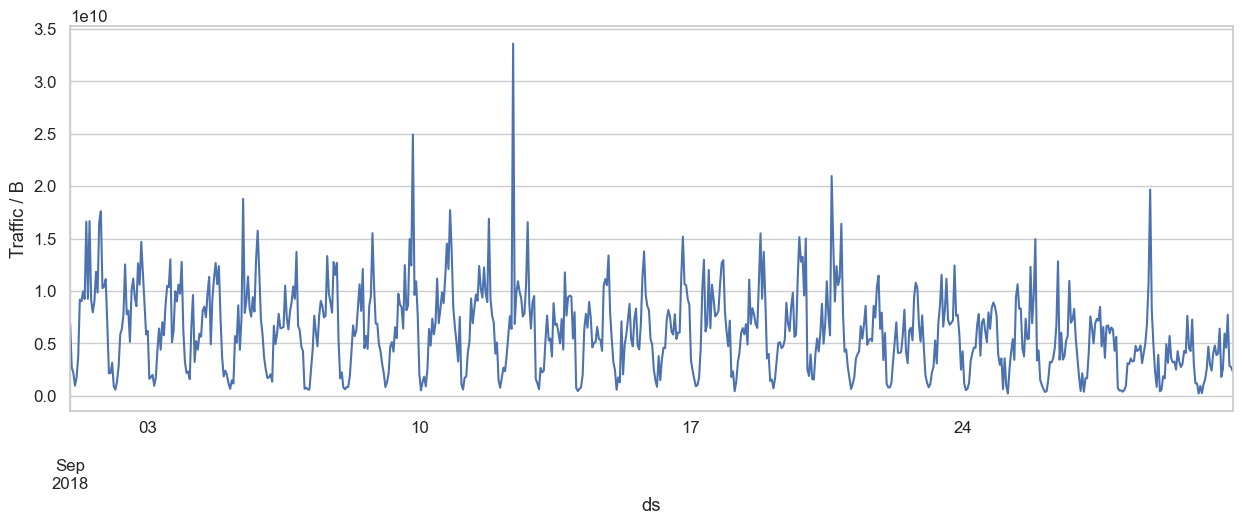

In [21]:
from pylab import mpl
sns.set(font_scale=1.1)
# 修改字号大小
plt.figure(figsize=(15,5))
# 修改画布大小
sns.set_style("whitegrid")
# 修改表格填充样式
# mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False
cdr.resample('1H', on='ds').y.sum().plot()
# aggregates the data within each hour interval(ds -> time, y -> data traffic)
plt.ylabel("Traffic / B")

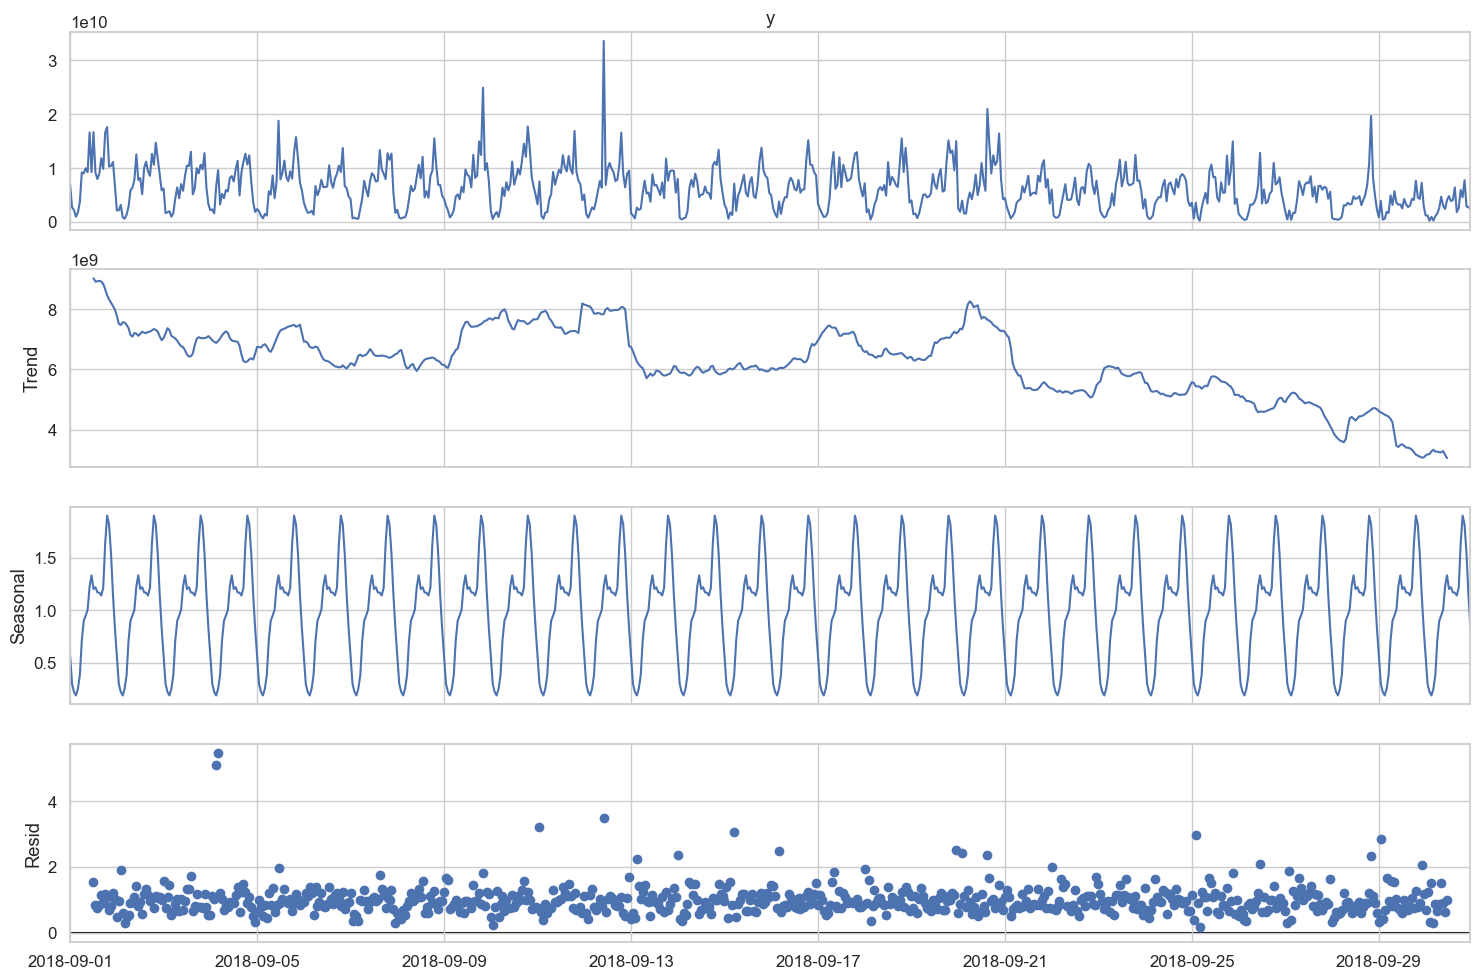

In [23]:
aggregate_sept = cdr.resample('1h', on='ds').y.sum()
# data aggregated within each hour interval
# seasonal decomposition
res_sept = sm.tsa.seasonal_decompose(aggregate_sept, model='multiplicative')
fig = res_sept.plot()
# 以res_sept数据画图
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout()
# 自动调整子图参数,使之填充整个图像区域

plt.show()